In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/btp-lucky/1-s2.0-S0038092X23004784-mmc1.xlsx


In [4]:
df=pd.read_excel("/kaggle/input/btp-lucky/1-s2.0-S0038092X23004784-mmc1.xlsx")

In [5]:
df.head()

,HTL:a,IDL1:b,perovskite:c,IDL2:d,ETL:e,FTO/ITO:f,金属背极,金属背极功函数,FTO功函数,Thickness():a,...,"Defect density,Nt(cm-3):a","Defect density,Nt(cm-3):b","Defect density,Nt(cm-3):c","Defect density,Nt(cm-3):d","Defect density,Nt(cm-3):e","Defect density,Nt(cm-3):f",Voc(V),Jsc(CH3NH3/cm2),FF(%),PCE(%)
0,NiO,NaN,CH3NH3PbBr3,NaN,PCBM,ITO,NaN,NaN,NaN,100.0,...,,,,,,NaN,1.047,7.974,77.85,6.50
1,Spiro-OMetAD,IDL,CH3NH3PbI3,NaN,TiO2,NaN,NaN,NaN,NaN,350.0,...,1000000000000000,1000000000000000,10000000000,,1000000000000000,NaN,1.151,20.070,87.29,20.17
2,Spiro-OMeTAD,IDL,CH3NH3PbI3,NaN,CdS,NaN,NaN,NaN,NaN,350.0,...,1000000000000000,1000000000000000,10000000000,,1000000000000000,NaN,1.193,19.610,83.05,19.43
3,Spiro-OMeTAD,IDL,CH3NH3PbI3,NaN,"Zn(O0.3,S0.7)",NaN,NaN,NaN,NaN,350.0,...,1000000000000000,1000000000000000,10000000000,,1000000000000000000,NaN,1.199,20.090,87.86,21.17
4,Spiro-OMeTAD,IDL,CH3NH3PbI3,NaN,ZnO,NaN,NaN,NaN,NaN,350.0,...,1000000000000000,1000000000000000,10000000000,,1000000000000000,NaN,1.152,20.200,87.27,20.30


In [6]:

df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
df.head()

,HTL:a,IDL1:b,perovskite:c,IDL2:d,ETL:e,FTO/ITO:f,金属背极,金属背极功函数,FTO功函数,Thickness():a,...,"Defect density,Nt(cm-3):a","Defect density,Nt(cm-3):b","Defect density,Nt(cm-3):c","Defect density,Nt(cm-3):d","Defect density,Nt(cm-3):e","Defect density,Nt(cm-3):f",Voc(V),Jsc(CH3NH3/cm2),FF(%),PCE(%)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.047,7.974,77.85,6.50
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,...,1.000000e+15,1.000000e+15,1.000000e+10,NaN,1.000000e+15,NaN,1.151,20.070,87.29,20.17
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,...,1.000000e+15,1.000000e+15,1.000000e+10,NaN,1.000000e+15,NaN,1.193,19.610,83.05,19.43
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,...,1.000000e+15,1.000000e+15,1.000000e+10,NaN,1.000000e+18,NaN,1.199,20.090,87.86,21.17
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,...,1.000000e+15,1.000000e+15,1.000000e+10,NaN,1.000000e+15,NaN,1.152,20.200,87.27,20.30


In [8]:
threshold = len(df) * 0.5

# Drop columns with more than 50% NaN values
df = df.dropna(thresh=threshold, axis=1)


In [9]:
df = df[df['PCE(%)'].notna() & (df['PCE(%)'] != "")]

In [10]:
df.head()

,金属背极功函数,Thickness():a,Thickness():c,Thickness():e,Thickness():f,"Band gap,Eg():a","Band gap,Eg():c","Band gap,Eg():e","Band gap,Eg():f","Electron affinity,χ():a",...,"Shallow acceptor density,NA(cm-3):a","Shallow acceptor density,NA(cm-3):c","Shallow acceptor density,NA(cm-3):e","Defect density,Nt(cm-3):a","Defect density,Nt(cm-3):c","Defect density,Nt(cm-3):e",Voc(V),Jsc(CH3NH3/cm2),FF(%),PCE(%)
0,NaN,100.0,1000.0,50.0,500.0,3.8,2.33,1.90,3.5,1.46,...,1.000000e+19,1.000000e+13,0.0,NaN,NaN,NaN,1.047,7.974,77.85,6.50
1,NaN,350.0,350.0,50.0,NaN,3.0,1.55,3.00,NaN,2.45,...,NaN,NaN,NaN,1.000000e+15,1.000000e+10,1.000000e+15,1.151,20.070,87.29,20.17
2,NaN,350.0,350.0,50.0,NaN,3.0,1.55,2.40,NaN,2.45,...,NaN,NaN,NaN,1.000000e+15,1.000000e+10,1.000000e+15,1.193,19.610,83.05,19.43
3,NaN,350.0,350.0,50.0,NaN,3.0,1.55,2.83,NaN,2.45,...,NaN,NaN,NaN,1.000000e+15,1.000000e+10,1.000000e+18,1.199,20.090,87.86,21.17
4,NaN,350.0,350.0,50.0,NaN,3.0,1.55,3.30,NaN,2.45,...,NaN,NaN,NaN,1.000000e+15,1.000000e+10,1.000000e+15,1.152,20.200,87.27,20.30


In [11]:
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column].fillna(mode_value, inplace=True)


/tmp/ipykernel_30/1038147469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [12]:
df.describe()

,金属背极功函数,Thickness():a,Thickness():c,Thickness():e,Thickness():f,"Band gap,Eg():a","Band gap,Eg():c","Band gap,Eg():e","Band gap,Eg():f","Electron affinity,χ():a",...,"Shallow acceptor density,NA(cm-3):a","Shallow acceptor density,NA(cm-3):c","Shallow acceptor density,NA(cm-3):e","Defect density,Nt(cm-3):a","Defect density,Nt(cm-3):c","Defect density,Nt(cm-3):e",Voc(V),Jsc(CH3NH3/cm2),FF(%),PCE(%)
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,846.000000,846.000000
mean,5.041572,202.056147,724.157293,254.158392,1030.178712,2.585173,1.542397,3.011064,3.493605,2.797222,...,4.725322e+20,7.907230e+17,4.002696e+17,3.814447e+17,1.914315e+17,3.726393e+16,1.040801,23.485253,70.476122,17.158474
std,0.480854,165.985900,6004.975407,4127.777300,17175.670926,0.696527,0.254481,0.571818,0.085433,0.943433,...,1.992432e+21,2.656357e+18,3.017036e+18,5.957244e+18,3.510888e+18,3.712922e+17,0.626262,7.854622,15.655739,6.707338
min,4.300000,3.000000,20.000000,1.000000,3.000000,0.950000,1.050000,1.290000,1.500000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+08,1.000000e+07,1.000000e+08,0.060000,1.000000,0.550000,0.000000
25%,5.100000,50.000000,350.000000,36.250000,500.000000,2.170000,1.410000,3.000000,3.500000,2.100000,...,1.000000e+18,1.000000e+09,0.000000e+00,1.000000e+15,1.000000e+14,1.000000e+15,0.860000,19.685000,64.730000,13.157500
50%,5.100000,200.000000,400.000000,50.000000,500.000000,2.880000,1.540000,3.200000,3.500000,2.900000,...,1.000000e+18,1.000000e+14,0.000000e+00,1.000000e+15,1.000000e+15,1.000000e+15,1.004500,23.620000,74.000000,18.465000
75%,5.100000,350.000000,600.000000,100.000000,500.000000,3.100000,1.590000,3.300000,3.500000,3.200000,...,1.000000e+19,1.275000e+16,0.000000e+00,1.000000e+15,1.000000e+15,1.000000e+15,1.140000,26.940000,81.457500,21.597500
max,12.100000,2000.000000,175000.000000,120000.000000,500000.000000,3.860000,3.930000,4.450000,3.890000,14.600000,...,1.000000e+22,2.000000e+19,5.000000e+19,1.000000e+20,1.000000e+20,1.000000e+19,10.000000,61.400000,92.380000,33.410000


In [13]:
df.describe()

,金属背极功函数,Thickness():a,Thickness():c,Thickness():e,Thickness():f,"Band gap,Eg():a","Band gap,Eg():c","Band gap,Eg():e","Band gap,Eg():f","Electron affinity,χ():a",...,"Shallow acceptor density,NA(cm-3):a","Shallow acceptor density,NA(cm-3):c","Shallow acceptor density,NA(cm-3):e","Defect density,Nt(cm-3):a","Defect density,Nt(cm-3):c","Defect density,Nt(cm-3):e",Voc(V),Jsc(CH3NH3/cm2),FF(%),PCE(%)
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,846.000000,846.000000
mean,5.041572,202.056147,724.157293,254.158392,1030.178712,2.585173,1.542397,3.011064,3.493605,2.797222,...,4.725322e+20,7.907230e+17,4.002696e+17,3.814447e+17,1.914315e+17,3.726393e+16,1.040801,23.485253,70.476122,17.158474
std,0.480854,165.985900,6004.975407,4127.777300,17175.670926,0.696527,0.254481,0.571818,0.085433,0.943433,...,1.992432e+21,2.656357e+18,3.017036e+18,5.957244e+18,3.510888e+18,3.712922e+17,0.626262,7.854622,15.655739,6.707338
min,4.300000,3.000000,20.000000,1.000000,3.000000,0.950000,1.050000,1.290000,1.500000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+08,1.000000e+07,1.000000e+08,0.060000,1.000000,0.550000,0.000000
25%,5.100000,50.000000,350.000000,36.250000,500.000000,2.170000,1.410000,3.000000,3.500000,2.100000,...,1.000000e+18,1.000000e+09,0.000000e+00,1.000000e+15,1.000000e+14,1.000000e+15,0.860000,19.685000,64.730000,13.157500
50%,5.100000,200.000000,400.000000,50.000000,500.000000,2.880000,1.540000,3.200000,3.500000,2.900000,...,1.000000e+18,1.000000e+14,0.000000e+00,1.000000e+15,1.000000e+15,1.000000e+15,1.004500,23.620000,74.000000,18.465000
75%,5.100000,350.000000,600.000000,100.000000,500.000000,3.100000,1.590000,3.300000,3.500000,3.200000,...,1.000000e+19,1.275000e+16,0.000000e+00,1.000000e+15,1.000000e+15,1.000000e+15,1.140000,26.940000,81.457500,21.597500
max,12.100000,2000.000000,175000.000000,120000.000000,500000.000000,3.860000,3.930000,4.450000,3.890000,14.600000,...,1.000000e+22,2.000000e+19,5.000000e+19,1.000000e+20,1.000000e+20,1.000000e+19,10.000000,61.400000,92.380000,33.410000


In [14]:
!pip install seaborn

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 23646 (\N{CJK UNIFIED IDEOGRAPH-5C5E}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 32972 (\N{CJK UNIFIED IDEOGRAPH-80CC}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 26497 (\N{CJK UNIFIED IDEOGRAPH-6781}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21151 (\N{CJK UNIFIED IDEOGRAPH-529F}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.draw()
/opt

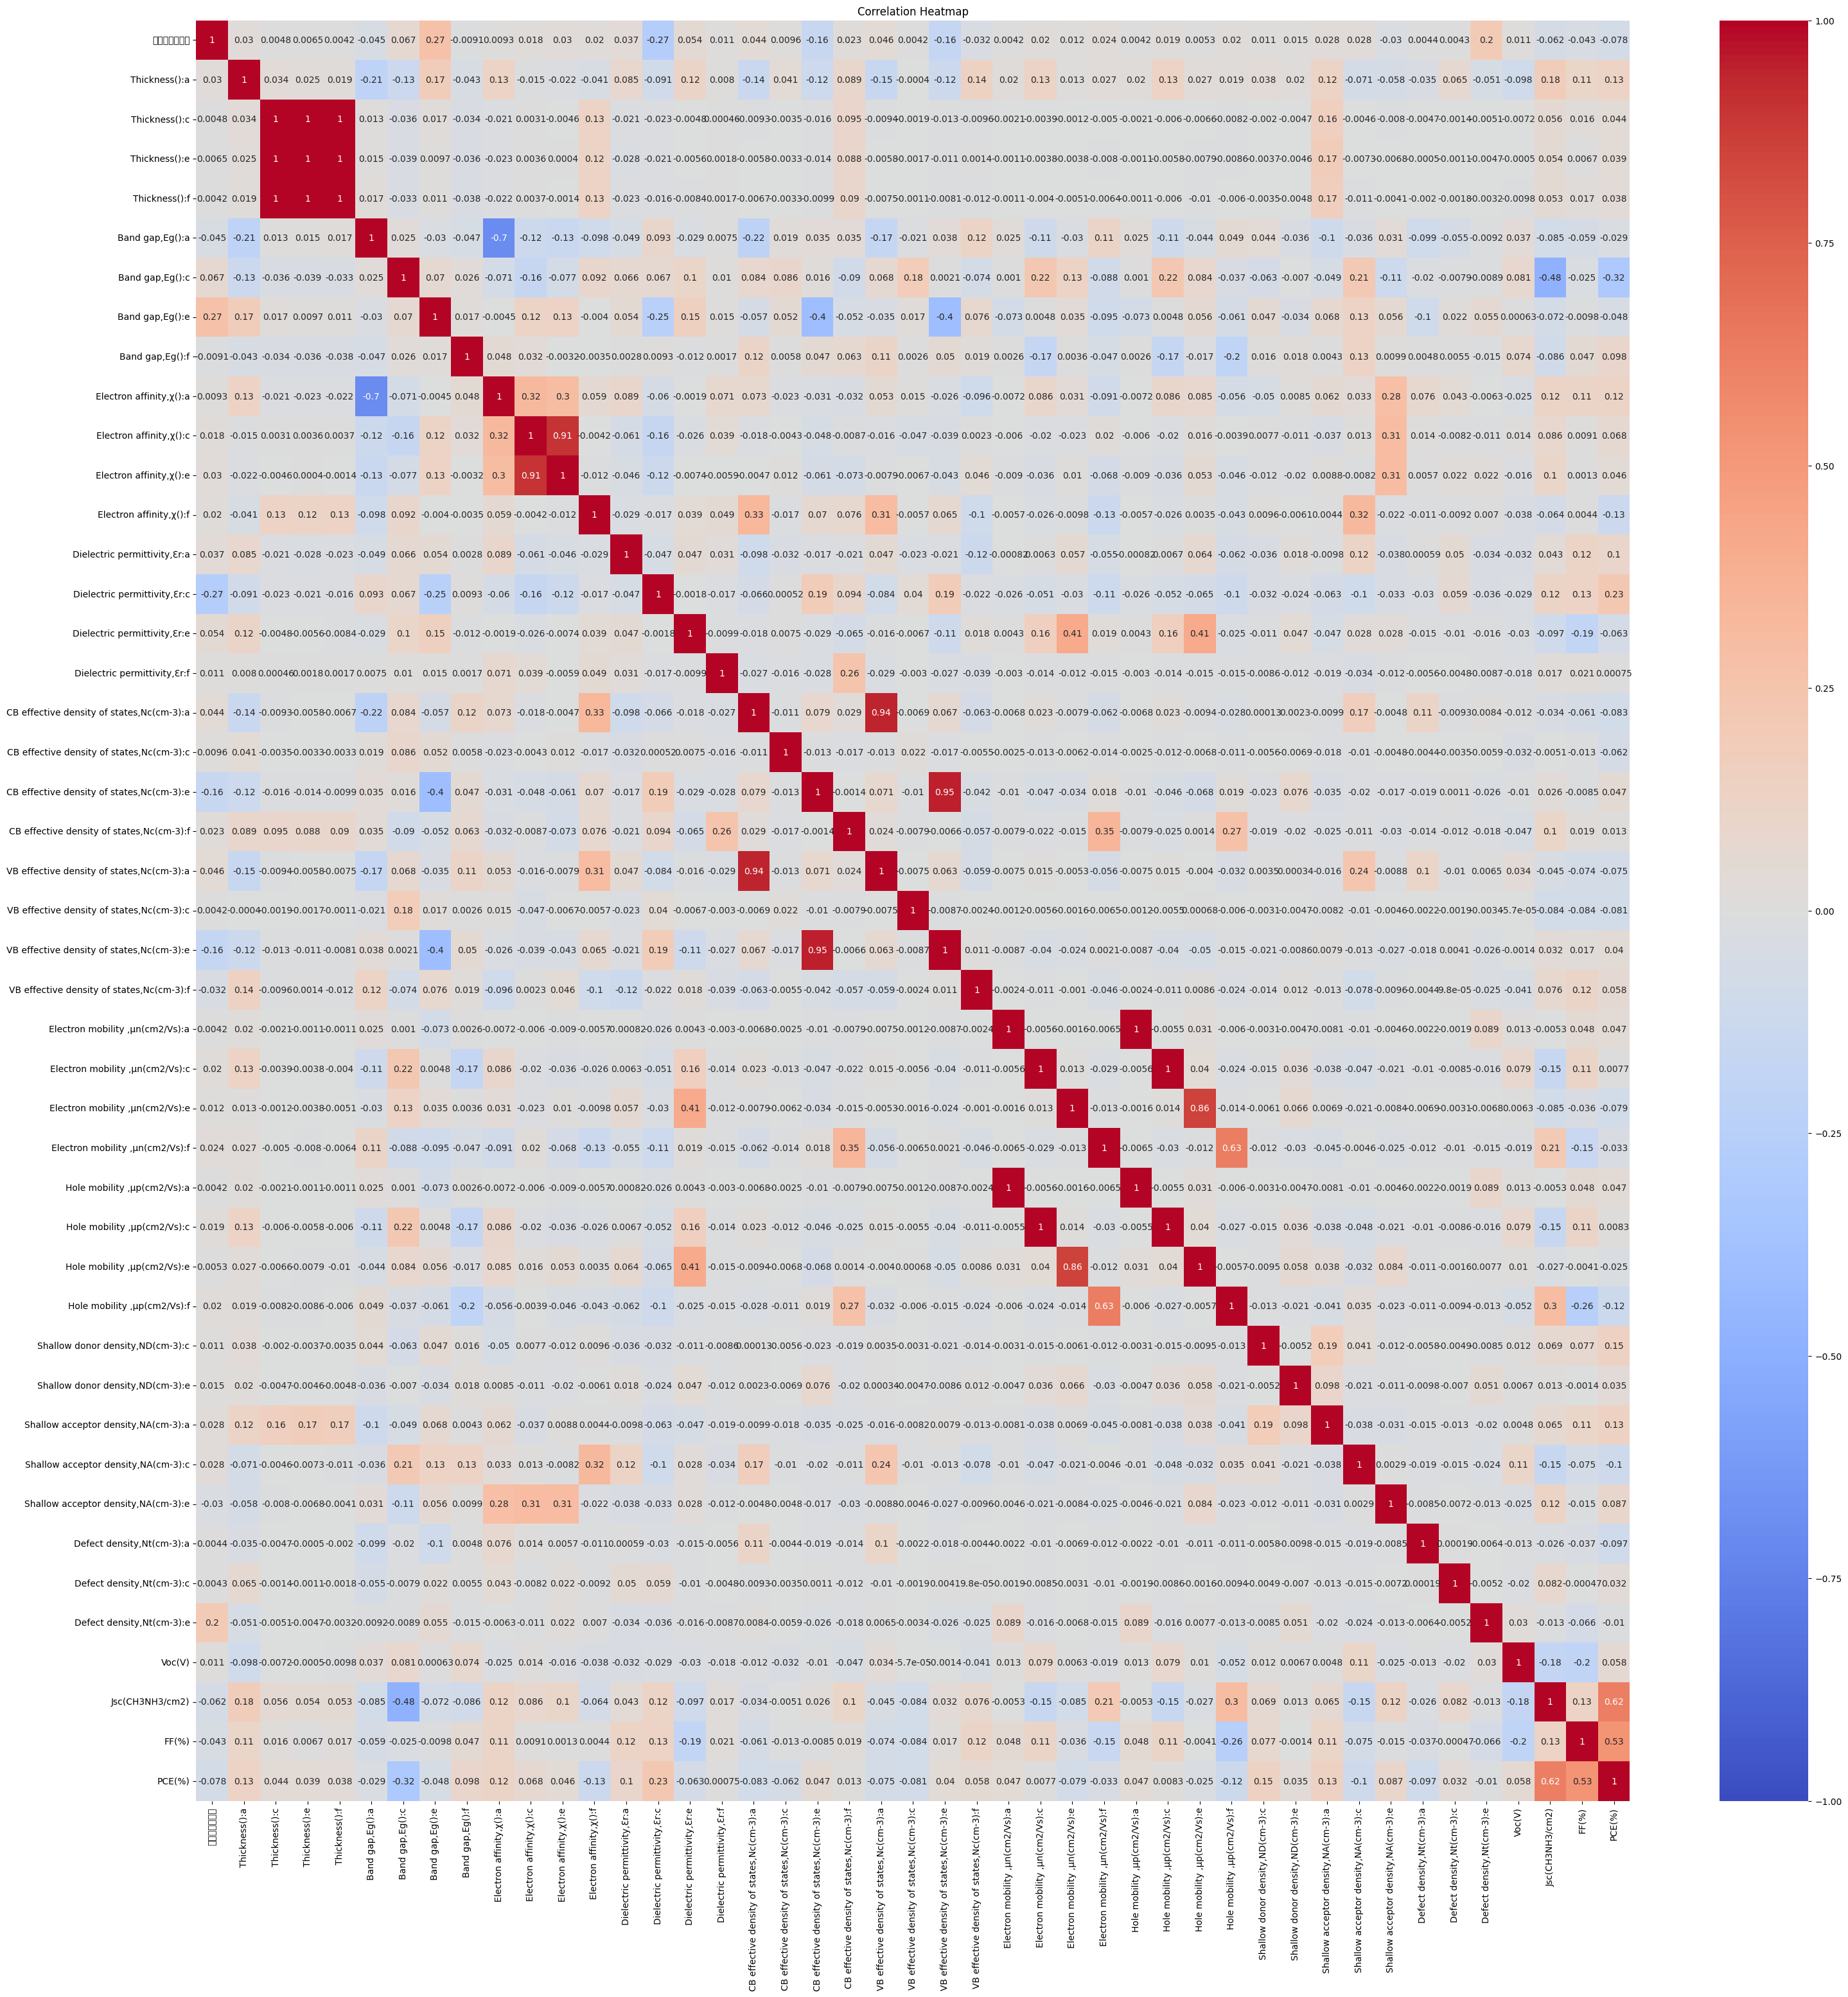

In [16]:
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(36, 36))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.columns

Index(['金属背极功函数', 'Thickness():a', 'Thickness():c', 'Thickness():e',
       'Thickness():f', 'Band gap,Eg():a', 'Band gap,Eg():c',
       'Band gap,Eg():e', 'Band gap,Eg():f', 'Electron affinity,χ():a',
       'Electron affinity,χ():c', 'Electron affinity,χ():e',
       'Electron affinity,χ():f', 'Dielectric permittivity,ℇr:a',
       'Dielectric permittivity,ℇr:c', 'Dielectric permittivity,ℇr:e',
       'Dielectric permittivity,ℇr:f',
       'CB effective density of states,Nc(cm-3):a',
       'CB effective density of states,Nc(cm-3):c',
       'CB effective density of states,Nc(cm-3):e',
       'CB effective density of states,Nc(cm-3):f',
       'VB effective density of states,Nc(cm-3):a',
       'VB effective density of states,Nc(cm-3):c',
       'VB effective density of states,Nc(cm-3):e',
       'VB effective density of states,Nc(cm-3):f',
       'Electron mobility ,μn(cm2/Vs):a', 'Electron mobility ,μn(cm2/Vs):c',
       'Electron mobility ,μn(cm2/Vs):e', 'Electron mobility ,μn(cm

In [18]:
lst=[ 'Thickness():a', 'Thickness():c', 'Thickness():e', 
       'Band gap,Eg():c', 
       'Band gap,Eg():e', 'Electron affinity,χ():a',
        'Electron affinity,χ():e', 
        'Dielectric permittivity,ℇr:a',
       'Dielectric permittivity,ℇr:c', 'Dielectric permittivity,ℇr:e',
       'CB effective density of states,Nc(cm-3):c',
       'VB effective density of states,Nc(cm-3):a',
       'VB effective density of states,Nc(cm-3):c',
       'VB effective density of states,Nc(cm-3):e',
       'Hole mobility ,μp(cm2/Vs):a', 'Hole mobility ,μp(cm2/Vs):c',
       'Hole mobility ,μp(cm2/Vs):e', 
       'Shallow donor density,ND(cm-3):c', 
       'Shallow acceptor density,NA(cm-3):a',
       'Shallow acceptor density,NA(cm-3):c', 'Defect density,Nt(cm-3):a']

In [19]:
dataset=df[lst]

In [20]:
dataset.describe()

,Thickness():a,Thickness():c,Thickness():e,"Band gap,Eg():c","Band gap,Eg():e","Electron affinity,χ():a","Electron affinity,χ():e","Dielectric permittivity,ℇr:a","Dielectric permittivity,ℇr:c","Dielectric permittivity,ℇr:e",...,"VB effective density of states,Nc(cm-3):a","VB effective density of states,Nc(cm-3):c","VB effective density of states,Nc(cm-3):e","Hole mobility ,μp(cm2/Vs):a","Hole mobility ,μp(cm2/Vs):c","Hole mobility ,μp(cm2/Vs):e","Shallow donor density,ND(cm-3):c","Shallow acceptor density,NA(cm-3):a","Shallow acceptor density,NA(cm-3):c","Defect density,Nt(cm-3):a"
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02
mean,202.056147,724.157293,254.158392,1.542397,3.011064,2.797222,4.140378,6.625924,13.207021,11.812396,...,3.853352e+20,4.141419e+22,1.467589e+20,2.127660e+15,2526.365215,23.328755,2.925884e+18,4.725322e+20,7.907230e+17,3.814447e+17
std,165.985900,6004.975407,4127.777300,0.254481,0.571818,0.943433,0.724840,5.313364,9.674924,14.409311,...,1.679490e+21,1.203323e+24,5.089874e+20,6.188527e+16,15720.326109,84.544949,3.241494e+19,1.992432e+21,2.656357e+18,5.957244e+18
min,3.000000,20.000000,1.000000,1.050000,1.290000,1.000000,1.460000,1.900000,2.590000,3.000000,...,1.800000e+12,1.000000e+13,1.000000e+13,2.000000e-08,0.000200,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+08
25%,50.000000,350.000000,36.250000,1.410000,3.000000,2.100000,4.000000,3.000000,6.600000,9.000000,...,1.100000e+19,1.000000e+18,1.000000e+19,2.000000e-04,1.600000,1.000000,0.000000e+00,1.000000e+18,1.000000e+09,1.000000e+15
50%,200.000000,400.000000,50.000000,1.540000,3.200000,2.900000,4.000000,6.500000,10.000000,9.000000,...,1.800000e+19,2.000000e+18,1.800000e+19,2.000000e-01,2.500000,10.000000,0.000000e+00,1.000000e+18,1.000000e+14,1.000000e+15
75%,350.000000,600.000000,100.000000,1.590000,3.300000,3.200000,4.200000,8.200000,16.930000,10.000000,...,1.800000e+19,1.007500e+19,2.200000e+19,4.390000e+01,15.000000,25.000000,1.000000e+10,1.000000e+19,1.275000e+16,1.000000e+15
max,2000.000000,175000.000000,120000.000000,3.930000,4.450000,14.600000,9.000000,60.000000,100.000000,100.000000,...,1.000000e+22,3.500000e+25,2.600000e+21,1.800000e+18,101000.000000,1000.000000,4.700000e+20,1.000000e+22,2.000000e+19,1.000000e+20


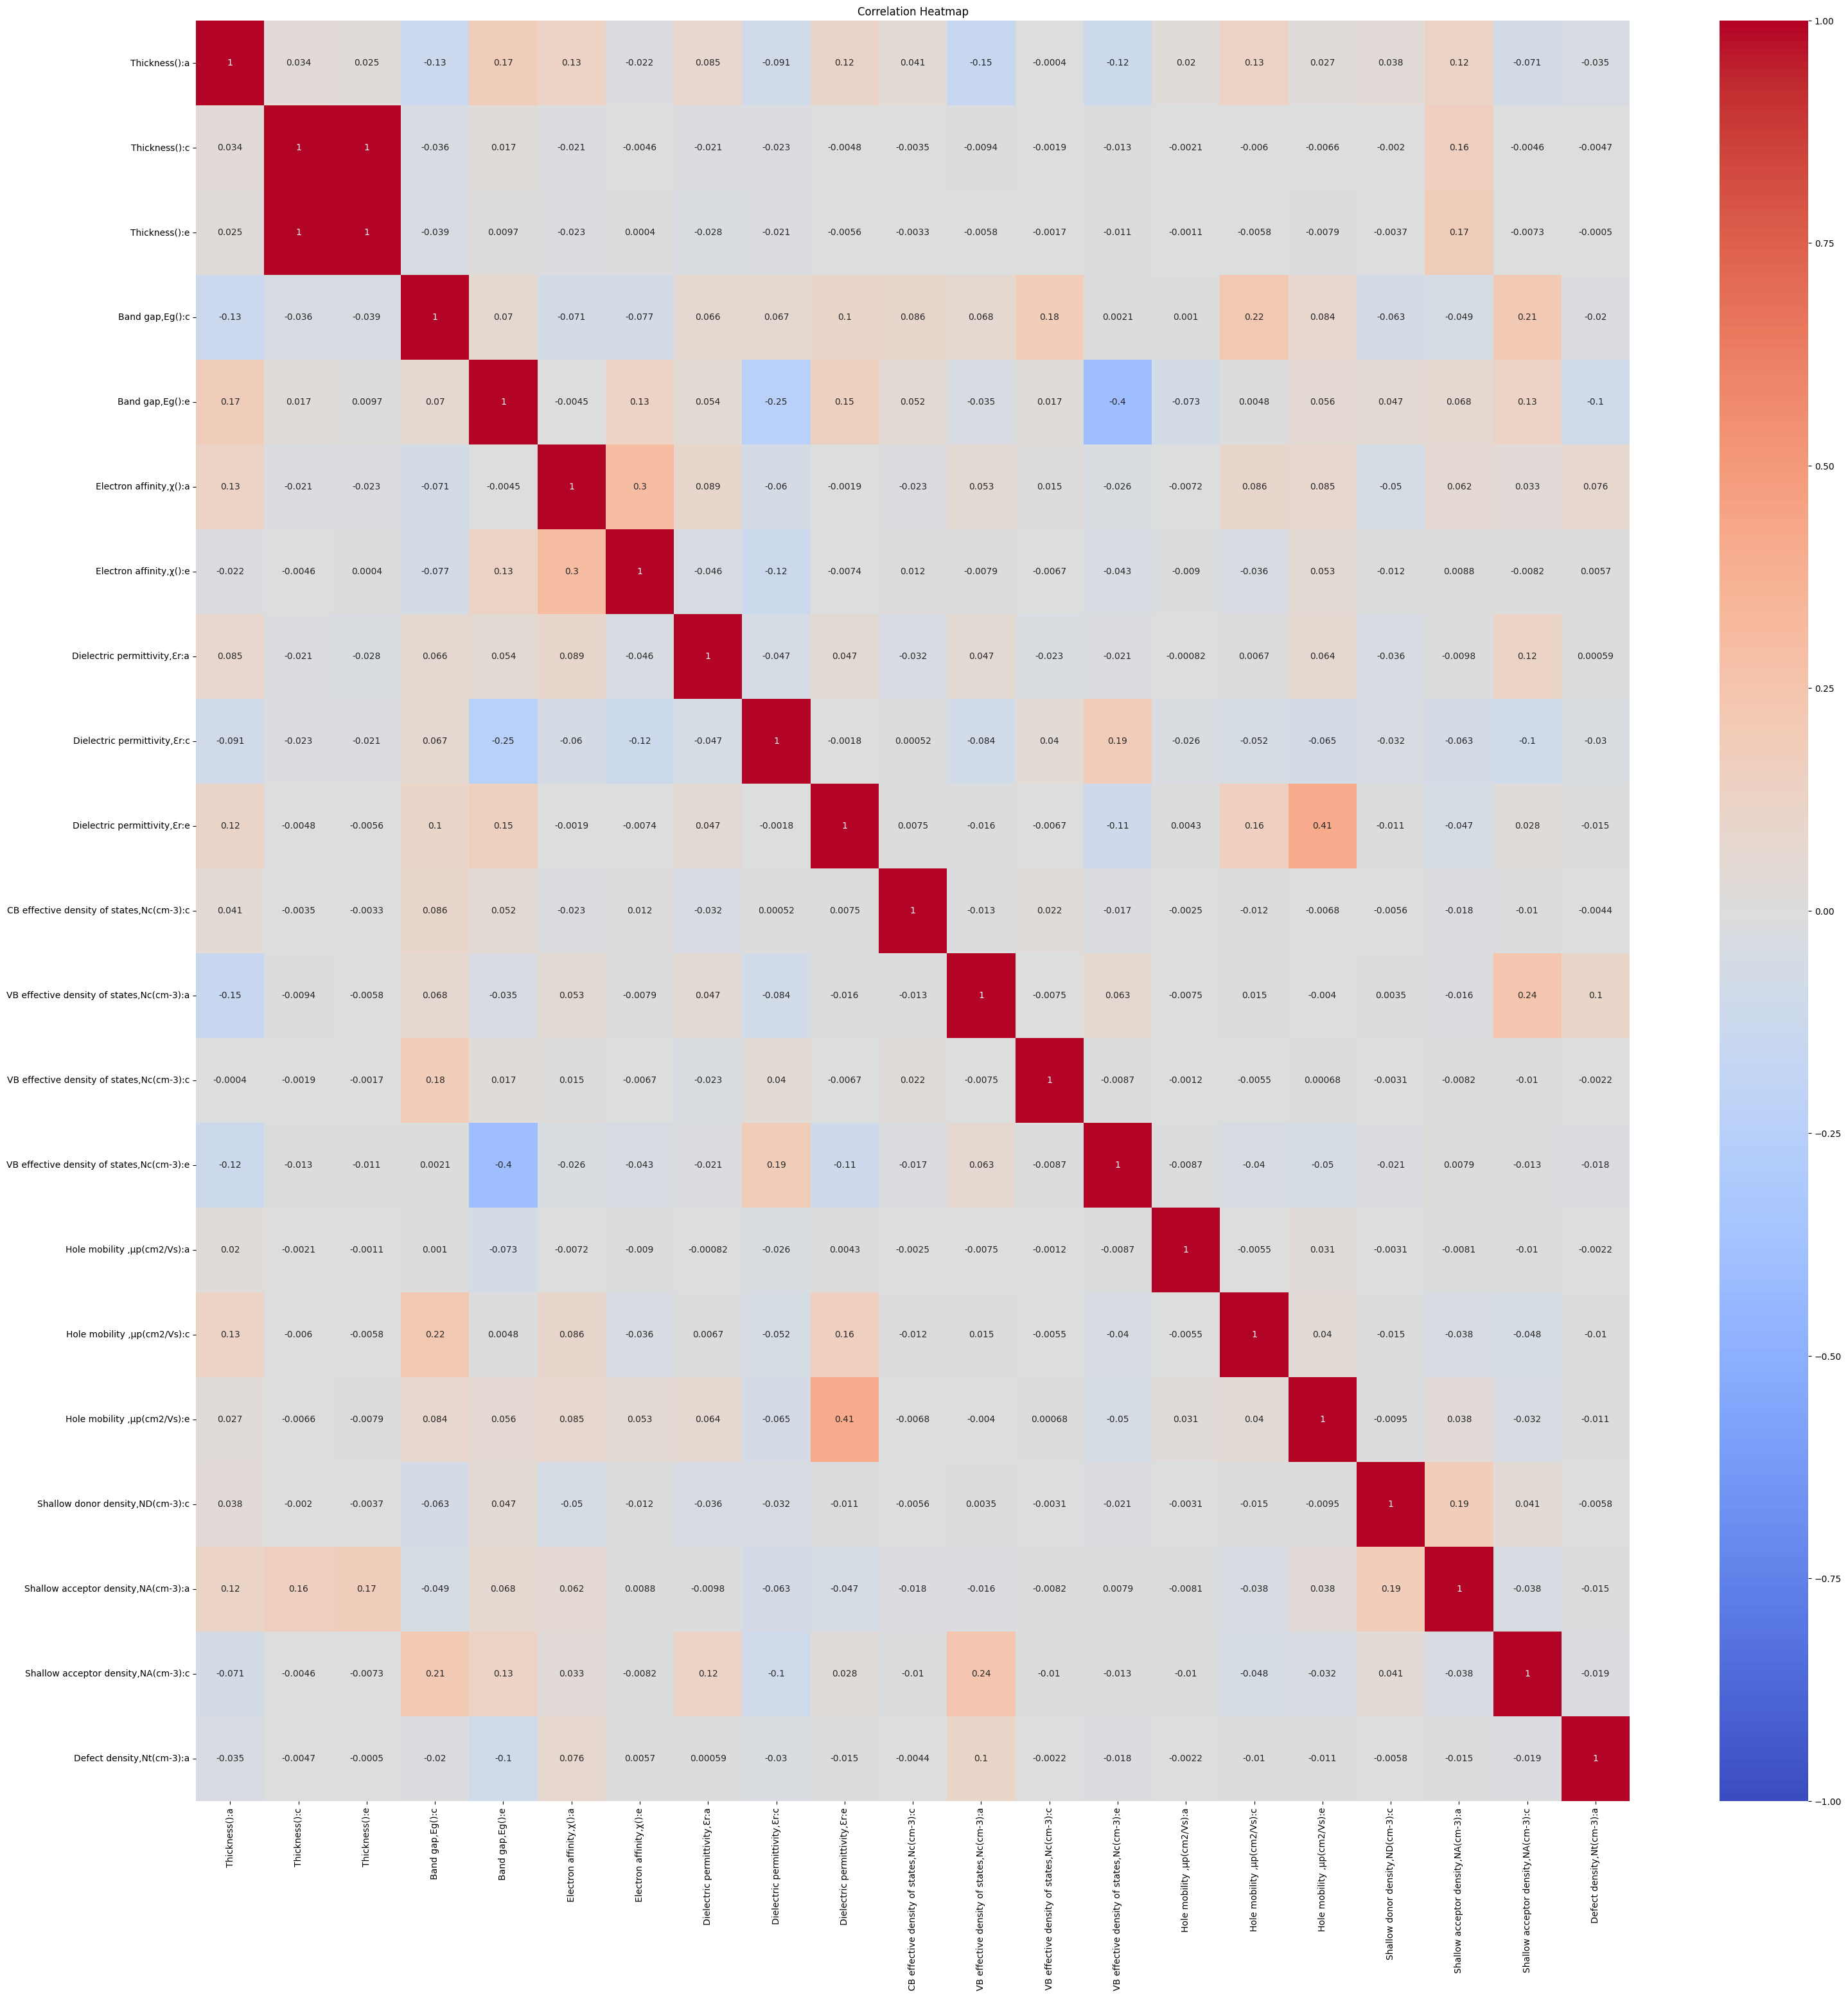

In [21]:
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(36, 36))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [22]:
!pip install scikit-learn


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score, mean_squared_error

In [24]:
X = dataset
y = df['PCE(%)']    

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
y_train.describe()

count    676.000000
mean      17.001354
std        6.785735
min        0.000000
25%       12.694250
50%       18.390000
75%       21.455000
max       33.410000
Name: PCE(%), dtype: float64

In [27]:
# Create a Random Forest Classifier
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

2.4350512552675774


In [35]:
y_test = np.array(y_test)
print(r2_score(y_test, y_pred))


0.6888635125720662


In [36]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.737428387263966

In [45]:
dct = {}
for i in X_train.columns:
    dct[str(i)] = (X_train[i].min(), X_train[i].max())

dct

{'Thickness():a': (3.0, 2000.0),
 'Thickness():c': (20.0, 175000.0),
 'Thickness():e': (1.0, 120000.0),
 'Band gap,Eg():c': (1.05, 2.9),
 'Band gap,Eg():e': (1.29, 4.45),
 'Electron affinity,χ():a': (1.0, 14.6),
 'Electron affinity,χ():e': (1.46, 9.0),
 'Dielectric permittivity,ℇr:a': (1.9, 60.0),
 'Dielectric permittivity,ℇr:c': (3.0, 100.0),
 'Dielectric permittivity,ℇr:e': (3.0, 100.0),
 'CB effective density of states,Nc(cm-3):c': (1000000000000.0, 1e+22),
 'VB effective density of states,Nc(cm-3):a': (1800000000000.0, 1e+22),
 'VB effective density of states,Nc(cm-3):c': (10000000000000.0, 3.5e+25),
 'VB effective density of states,Nc(cm-3):e': (10000000000000.0, 2.5e+21),
 'Hole mobility ,μp(cm2/Vs):a': (2e-08, 1.8e+18),
 'Hole mobility ,μp(cm2/Vs):c': (0.0002, 101000.0),
 'Hole mobility ,μp(cm2/Vs):e': (2e-06, 1000.0),
 'Shallow donor density,ND(cm-3):c': (0.0, 4.7e+20),
 'Shallow acceptor density,NA(cm-3):a': (0.0, 1e+22),
 'Shallow acceptor density,NA(cm-3):c': (0.0, 2e+19),
 

In [49]:
from bayes_opt import BayesianOptimization
import numpy as np

# Initialize ExtraTreesRegressor as before
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)
extra_trees.fit(X_train, y_train)  # Train the model with training data

# Get target PCE percentage from the user
target_pce = float(input("Enter the target PCE percentage: "))

# Define the function to minimize
def objective(**kwargs):
    # Extract feature values from the keyword arguments
    features = np.array([kwargs[key] for key in pbounds.keys()]).reshape(1, -1)
    print(features)
    
    # Predict PCE percentage based on the features
    pred_pce = extra_trees.predict(features)[0]
    print(-abs(pred_pce - target_pce))
    
    # Calculate the difference between the predicted and target PCE percentage
    return -abs(pred_pce - target_pce)  # Negative because we want to maximize this function

# Define bounds for each feature (replace with realistic bounds based on data)
pbounds = dct  # Define actual min and max for each feature

# Initialize Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective,
    pbounds=pbounds,
    random_state=42,
)

# Run optimization
optimizer.maximize(init_points=10, n_iter=100)

# Best feature values
best_features = optimizer.max['params']
print("Feature values for the target PCE percentage:", best_features)


Enter the target PCE percentage:  23


|   iter    |  target   | Band g... | Band g... | CB eff... | Defect... | Dielec... | Dielec... | Dielec... | Electr... | Electr... | Hole m... | Hole m... | Hole m... | Shallo... | Shallo... | Shallo... | Thickn... | Thickn... | Thickn... | VB eff... | VB eff... | VB eff... |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-11.141751666666671
| 1         | -11.14    | 1.743     | 4.294     | 7.32e+21  | 5.987e+19 | 10.96     | 18.13     | 8.634     | 12.78     | 5.992     | 1.275e+18 | 2.079e+03 | 969.9     | 8.324e+21 | 4.247e+18 | 8.546e+19 | 369.3     | 5.326e+04 | 6.297e+04 | 4.319e+21 | 1.019e+25 | 1.53e+21  |
-4.808499999999977
| 2         | -4.808    | 1.308     | 2.213     | 3.664e+21 | 4.561e+19 | 47.52     | 22.37     | 52.88     | 9.057     | 1.81 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have 

-3.7911833333333362
| 11        | -3.791    | 1.963     | 2.688     | 7.556e+21 | 2.288e+19 | 6.239     | 30.97     | 18.5      | 14.41     | 7.962     | 1.14e+18  | 8.802e+04 | 803.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.615e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-3.6437833333333316
| 12        | -3.644    | 1.937     | 2.409     | 7.556e+21 | 2.288e+19 | 6.609     | 31.34     | 18.87     | 12.11     | 6.833     | 1.14e+18  | 8.802e+04 | 803.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.616e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-1.5107009999999974
| 13        | -1.511    | 1.05      | 2.218     | 7.556e+21 | 2.288e+19 | 6.838     | 31.57     | 19.1      | 14.27     | 6.108     | 1.14e+18  | 8.802e+04 | 803.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.616e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-1.791334333333328
| 14        | -1.791    | 1.05      | 1.516     | 7.556e+21 | 2.288e+19 | 5.748     | 30.48     | 18.01     | 13.71     | 6.01      | 1.14e+18  | 8.802e+04 | 803.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.616e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-1.6998209999999965
| 15        | -1.7      | 1.05      | 2.959     | 7.556e+21 | 2.288e+19 | 7.009     | 30.63     | 18.16     | 13.7      | 6.503     | 1.14e+18  | 8.802e+04 | 803.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.616e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-1.616034333333328
| 16        | -1.616    | 1.05      | 3.208     | 7.556e+21 | 2.288e+19 | 6.593     | 29.89     | 18.2      | 13.7      | 5.644     | 1.14e+18  | 8.802e+04 | 803.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.614e+03 | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.35708600000000246
| 17        | -0.3571   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.23     | 9.174     | 4.3       | 9.0       | 1.14e+18  | 8.802e+04 | 798.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-6.124550000000006
| 18        | -6.125    | 2.428     | 4.436     | 7.556e+21 | 2.288e+19 | 1.94      | 21.3      | 9.248     | 4.382     | 8.973     | 1.14e+18  | 8.802e+04 | 798.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.35708600000000246
| 19        | -0.3571   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.16     | 9.105     | 4.224     | 9.0       | 1.14e+18  | 8.802e+04 | 798.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.40118866666667685
| 20        | -0.4012   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.06     | 7.699     | 2.82      | 9.0       | 1.14e+18  | 8.802e+04 | 796.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.30098600000000175
| 21        | -0.301    | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.16     | 7.718     | 6.276     | 9.0       | 1.14e+18  | 8.802e+04 | 796.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1887860000000039
| 22        | -0.1888   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 18.41     | 8.222     | 4.721     | 9.0       | 1.14e+18  | 8.802e+04 | 796.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 23        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 19.85     | 10.66     | 4.645     | 9.0       | 1.14e+18  | 8.802e+04 | 795.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.35708600000000246
| 24        | -0.3571   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.59     | 9.375     | 4.674     | 9.0       | 1.14e+18  | 8.802e+04 | 794.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.614e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.34648599999999874
| 25        | -0.3465   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.53     | 9.581     | 4.684     | 9.0       | 1.14e+18  | 8.802e+04 | 795.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 26        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 19.78     | 9.982     | 4.678     | 9.0       | 1.14e+18  | 8.802e+04 | 797.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 27        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 23.93     | 10.88     | 4.604     | 9.0       | 1.14e+18  | 8.802e+04 | 795.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.614e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.35708600000000246
| 28        | -0.3571   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.83     | 9.552     | 4.701     | 5.198     | 1.14e+18  | 8.802e+04 | 796.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 29        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.78     | 11.99     | 7.985     | 7.831     | 1.14e+18  | 8.802e+04 | 796.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.17603533333333843
| 30        | -0.176    | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.66     | 13.58     | 3.076     | 7.475     | 1.14e+18  | 8.802e+04 | 796.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.8882500000000029
| 31        | -0.8883   | 1.448     | 3.062     | 3.571e+21 | 4.129e+19 | 57.77     | 78.25     | 62.8      | 5.223     | 8.703     | 1.528e+18 | 5.625e+03 | 162.2     | 1.391e+21 | 1.319e+19 | 3.306e+20 | 1.607e+03 | 1.65e+05  | 1.002e+04 | 1.629e+21 | 2.284e+25 | 8.242e+20 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-7.805719333333336
| 32        | -7.806    | 1.212     | 3.443     | 8.691e+20 | 1.072e+19 | 36.2      | 72.23     | 46.71     | 8.585     | 3.945     | 2.205e+17 | 7.712e+04 | 41.76     | 2.962e+21 | 1.855e+19 | 1.826e+19 | 365.2     | 4.367e+04 | 3.282e+04 | 9.399e+21 | 1.919e+25 | 6.232e+20 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 33        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.68     | 12.85     | 4.993     | 6.979     | 1.14e+18  | 8.802e+04 | 798.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 34        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 23.6      | 13.1      | 5.219     | 6.23      | 1.14e+18  | 8.802e+04 | 795.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 35        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.39     | 13.89     | 5.231     | 6.035     | 1.14e+18  | 8.802e+04 | 797.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.616e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 36        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 24.1      | 12.45     | 5.227     | 5.655     | 1.14e+18  | 8.802e+04 | 798.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 37        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 21.37     | 12.6      | 5.328     | 6.508     | 1.14e+18  | 8.802e+04 | 795.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 38        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 23.35     | 16.47     | 6.052     | 9.0       | 1.14e+18  | 8.802e+04 | 796.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 39        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 19.96     | 15.0      | 5.911     | 5.353     | 1.14e+18  | 8.802e+04 | 798.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.33598200000000844
| 40        | -0.336    | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 23.28     | 14.6      | 1.647     | 6.337     | 1.14e+18  | 8.802e+04 | 798.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 41        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 23.91     | 12.95     | 7.299     | 7.055     | 1.14e+18  | 8.802e+04 | 798.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 42        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.28     | 13.8      | 4.484     | 8.773     | 1.14e+18  | 8.802e+04 | 800.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.614e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 43        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 22.32     | 13.94     | 4.798     | 8.202     | 1.14e+18  | 8.802e+04 | 796.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.615e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 44        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 22.74     | 13.13     | 4.472     | 9.0       | 1.14e+18  | 8.802e+04 | 798.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.21668600000000282
| 45        | -0.2167   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 19.25     | 15.0      | 4.254     | 9.0       | 1.14e+18  | 8.802e+04 | 796.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.5670660000000041
| 46        | -0.5671   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 22.02     | 15.44     | 4.171     | 9.0       | 1.14e+18  | 8.802e+04 | 801.1     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.014397999999992805
| 47        | -0.0144   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.34     | 11.62     | 1.604     | 6.426     | 1.14e+18  | 8.802e+04 | 798.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1946860000000008
| 48        | -0.1947   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 15.91     | 12.56     | 5.28      | 9.0       | 1.14e+18  | 8.802e+04 | 796.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.21668600000000282
| 49        | -0.2167   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.31     | 10.8      | 7.168     | 8.102     | 1.14e+18  | 8.802e+04 | 799.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3148660000000021
| 50        | -0.3149   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.19     | 15.15     | 3.919     | 9.0       | 1.14e+18  | 8.802e+04 | 797.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.21668600000000282
| 51        | -0.2167   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.19     | 12.9      | 4.303     | 9.0       | 1.14e+18  | 8.802e+04 | 798.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.21668600000000282
| 52        | -0.2167   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.34     | 10.93     | 5.084     | 6.788     | 1.14e+18  | 8.802e+04 | 800.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.10805699999999518
| 53        | -0.1081   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 16.38     | 13.33     | 4.794     | 7.984     | 1.14e+18  | 8.802e+04 | 799.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1300569999999972
| 54        | -0.1301   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.64     | 11.63     | 5.02      | 6.079     | 1.14e+18  | 8.802e+04 | 795.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1300569999999972
| 55        | -0.1301   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.36     | 14.28     | 8.64      | 9.0       | 1.14e+18  | 8.802e+04 | 799.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.023756999999996253
| 56        | -0.02376  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.28     | 13.34     | 3.692     | 8.532     | 1.14e+18  | 8.802e+04 | 800.1     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.12785699999999522
| 57        | -0.1279   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.19     | 10.13     | 4.096     | 9.0       | 1.14e+18  | 8.802e+04 | 798.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.816e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.13665699999999603
| 58        | -0.1367   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.45     | 9.708     | 6.364     | 5.748     | 1.14e+18  | 8.802e+04 | 799.1     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1300569999999972
| 59        | -0.1301   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.91     | 11.73     | 7.281     | 9.0       | 1.14e+18  | 8.802e+04 | 796.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.05685366666666525
| 60        | -0.05685  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.38     | 11.87     | 2.54      | 9.0       | 1.14e+18  | 8.802e+04 | 798.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24005699999999663
| 61        | -0.2401   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.41     | 10.32     | 4.335     | 6.537     | 1.14e+18  | 8.802e+04 | 801.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.16211300000000506
| 62        | -0.1621   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 19.45     | 11.25     | 1.082     | 9.0       | 1.14e+18  | 8.802e+04 | 794.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.13585366666666587
| 63        | -0.1359   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.42     | 11.98     | 2.834     | 9.0       | 1.14e+18  | 8.801e+04 | 797.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24225699999999506
| 64        | -0.2423   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.86     | 12.83     | 4.414     | 9.0       | 1.14e+18  | 8.802e+04 | 797.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.03274300000000352
| 65        | -0.03274  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 15.43     | 7.474     | 3.575     | 9.0       | 1.14e+18  | 8.802e+04 | 798.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24488600000000105
| 66        | -0.2449   | 1.05      | 3.651     | 7.556e+21 | 2.288e+19 | 1.9       | 19.02     | 9.481     | 4.525     | 6.207     | 1.14e+18  | 8.802e+04 | 796.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.16135699999999886
| 67        | -0.1614   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.6      | 8.883     | 7.427     | 9.0       | 1.14e+18  | 8.802e+04 | 797.1     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.12187966666666838
| 68        | -0.1219   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 16.76     | 10.84     | 3.145     | 5.197     | 1.14e+18  | 8.802e+04 | 797.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.03512900000000485
| 69        | -0.03513  | 1.05      | 1.599     | 7.556e+21 | 2.288e+19 | 1.9       | 15.21     | 11.41     | 5.355     | 4.898     | 1.14e+18  | 8.802e+04 | 798.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.27431300000000647
| 70        | -0.2743   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 19.12     | 11.45     | 1.0       | 7.135     | 1.14e+18  | 8.802e+04 | 797.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.33616866666667633
| 71        | -0.3362   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.46     | 9.885     | 2.662     | 7.87      | 1.14e+18  | 8.802e+04 | 799.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2756290000000021
| 72        | -0.2756   | 1.05      | 2.659     | 7.556e+21 | 2.288e+19 | 1.9       | 17.96     | 7.881     | 3.575     | 5.169     | 1.14e+18  | 8.802e+04 | 794.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.1887860000000039
| 73        | -0.1888   | 1.05      | 3.452     | 7.556e+21 | 2.288e+19 | 1.9       | 17.77     | 7.269     | 8.024     | 5.605     | 1.14e+18  | 8.802e+04 | 798.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.48043699999999134
| 74        | -0.4804   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 22.04     | 10.51     | 6.174     | 4.778     | 1.14e+18  | 8.802e+04 | 798.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2121569999999977
| 75        | -0.2122   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.19     | 6.923     | 4.208     | 8.304     | 1.14e+18  | 8.802e+04 | 795.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.10805699999999518
| 76        | -0.1081   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 16.6      | 11.36     | 6.896     | 8.754     | 1.14e+18  | 8.802e+04 | 798.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.605e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.15268600000000276
| 77        | -0.1527   | 1.05      | 3.898     | 7.556e+21 | 2.288e+19 | 1.9       | 14.5      | 10.69     | 4.353     | 8.413     | 1.14e+18  | 8.802e+04 | 793.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.0999569999999963
| 78        | -0.09996  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.18     | 7.606     | 6.0       | 9.0       | 1.14e+18  | 8.802e+04 | 796.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2501860000000029
| 79        | -0.2502   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.45     | 8.381     | 4.807     | 9.0       | 1.14e+18  | 8.802e+04 | 795.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.604e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.13935699999999684
| 80        | -0.1394   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 15.52     | 8.987     | 4.285     | 9.0       | 1.14e+18  | 8.802e+04 | 797.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.156056999999997
| 81        | -0.1561   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.3      | 9.537     | 6.318     | 9.0       | 1.14e+18  | 8.802e+04 | 802.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.606e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.13207299999999478
| 82        | -0.1321   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.42     | 5.158     | 3.463     | 9.0       | 1.14e+18  | 8.802e+04 | 799.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.0050446666666630335
| 83        | -0.005045 | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.6      | 7.544     | 3.008     | 9.0       | 1.14e+18  | 8.802e+04 | 800.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3225090000000037
| 84        | -0.3225   | 1.05      | 2.114     | 7.556e+21 | 2.288e+19 | 7.131     | 17.81     | 9.706     | 4.769     | 8.187     | 1.14e+18  | 8.802e+04 | 798.1     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.3288860000000007
| 85        | -0.3289   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 20.78     | 10.93     | 6.319     | 9.0       | 1.14e+18  | 8.802e+04 | 797.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.607e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2121569999999977
| 86        | -0.2122   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 19.91     | 7.464     | 6.673     | 9.0       | 1.14e+18  | 8.802e+04 | 801.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2121569999999977
| 87        | -0.2122   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 21.34     | 6.828     | 5.225     | 9.0       | 1.14e+18  | 8.802e+04 | 800.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.603e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24005699999999663
| 88        | -0.2401   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.94     | 10.28     | 8.403     | 9.0       | 1.14e+18  | 8.802e+04 | 798.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.605e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.059856999999997385
| 89        | -0.05986  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 13.18     | 10.14     | 9.523     | 9.0       | 1.14e+18  | 8.802e+04 | 797.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.20099300000000397
| 90        | -0.201    | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.65     | 7.144     | 1.711     | 9.0       | 1.14e+18  | 8.802e+04 | 797.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.18302900000000477
| 91        | -0.183    | 1.05      | 2.7       | 7.556e+21 | 2.288e+19 | 1.9       | 13.06     | 10.44     | 7.248     | 9.0       | 1.14e+18  | 8.802e+04 | 800.9     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.09685699999999642
| 92        | -0.09686  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.53     | 12.95     | 3.784     | 9.0       | 1.14e+18  | 8.802e+04 | 802.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-3.4940499999999695
| 93        | -3.494    | 1.154     | 3.781     | 8.62e+21  | 7.804e+19 | 7.696     | 76.93     | 49.81     | 3.929     | 2.212     | 9.594e+17 | 3.053e+04 | 524.3     | 9.093e+21 | 1.183e+19 | 4.286e+20 | 1.229e+03 | 9.212e+04 | 1.254e+04 | 3.564e+21 | 1.837e+25 | 1.345e+20 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2143019999999929
| 94        | -0.2143   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.63     | 7.901     | 4.09      | 4.442     | 1.14e+18  | 8.802e+04 | 801.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.0999569999999963
| 95        | -0.09996  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.12     | 6.827     | 4.136     | 8.79      | 1.14e+18  | 8.802e+04 | 803.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.0999569999999963
| 96        | -0.09996  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.75     | 8.316     | 8.359     | 9.0       | 1.14e+18  | 8.803e+04 | 800.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2121569999999977
| 97        | -0.2122   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.87     | 6.847     | 6.337     | 9.0       | 1.14e+18  | 8.802e+04 | 801.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.04918699999999632
| 98        | -0.04919  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 21.12     | 10.02     | 2.108     | 9.0       | 1.14e+18  | 8.803e+04 | 802.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.61e+03  | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.20099300000000397
| 99        | -0.201    | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.91     | 7.364     | 1.0       | 9.0       | 1.14e+18  | 8.802e+04 | 804.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24796699999999916
| 100       | -0.248    | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 24.43     | 10.16     | 1.742     | 9.0       | 1.14e+18  | 8.802e+04 | 800.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.24005699999999663
| 101       | -0.2401   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.87     | 10.27     | 4.839     | 4.897     | 1.14e+18  | 8.802e+04 | 799.6     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.450336999999994
| 102       | -0.4503   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 23.7      | 6.946     | 5.435     | 9.0       | 1.14e+18  | 8.803e+04 | 801.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.608e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.4782369999999929
| 103       | -0.4782   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 22.34     | 9.955     | 4.317     | 7.0       | 1.14e+18  | 8.802e+04 | 804.0     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.614e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.10805699999999518
| 104       | -0.1081   | 1.05      | 1.493     | 7.556e+21 | 2.288e+19 | 1.9       | 15.49     | 10.58     | 6.833     | 8.584     | 1.14e+18  | 8.802e+04 | 801.3     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.21668600000000282
| 105       | -0.2167   | 1.05      | 4.45      | 7.556e+21 | 2.288e+19 | 1.9       | 17.19     | 10.2      | 7.736     | 9.0       | 1.14e+18  | 8.803e+04 | 797.2     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.03595699999999269
| 106       | -0.03596  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 14.83     | 5.26      | 7.979     | 9.0       | 1.14e+18  | 8.802e+04 | 797.5     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.0999569999999963
| 107       | -0.09996  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 17.57     | 6.615     | 9.455     | 9.0       | 1.14e+18  | 8.802e+04 | 792.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.609e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.07795699999999783
| 108       | -0.07796  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 16.07     | 6.021     | 8.004     | 9.0       | 1.14e+18  | 8.802e+04 | 796.7     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.612e+03 | 1.568e+05 | 3.814e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(


-0.2121569999999977
| 109       | -0.2122   | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 20.67     | 4.488     | 6.935     | 9.0       | 1.14e+18  | 8.802e+04 | 796.4     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.613e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |
-0.0999569999999963
| 110       | -0.09996  | 1.05      | 1.29      | 7.556e+21 | 2.288e+19 | 1.9       | 18.39     | 7.078     | 11.29     | 9.0       | 1.14e+18  | 8.802e+04 | 800.8     | 1.866e+21 | 1.785e+19 | 2.535e+20 | 1.611e+03 | 1.568e+05 | 3.815e+04 | 1.101e+21 | 7.978e+24 | 1.068e+21 |
Feature values for the target PCE percentage: {'Band gap,Eg():c': 1.05, 'Band gap,Eg():e': 4.45, 'CB effective density of states,Nc(cm-3):c': 7.555511385674936e+21, 'Defect density,Nt(cm-3):a': 2.2879816549239366e+19, 'Dielectric permittivity,ℇr:a': 1.9, 'Dielectric permittivity,ℇr:c': 17.603221762561812, 'Dielectric permittivity,ℇr:e': 7.543538357901257, 'Electron affinity,χ():a': 3.007657643433909, 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
